In [3]:
# import system libs
import os
import itertools

# import data handling tools
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.image import load_img

#import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [4]:
#paths to the datasets
folder_path = "Dataset/"
Train_set = "Dataset/train/"
Validation_set = "Dataset/validation/"
Test_set = "Dataset/test/"

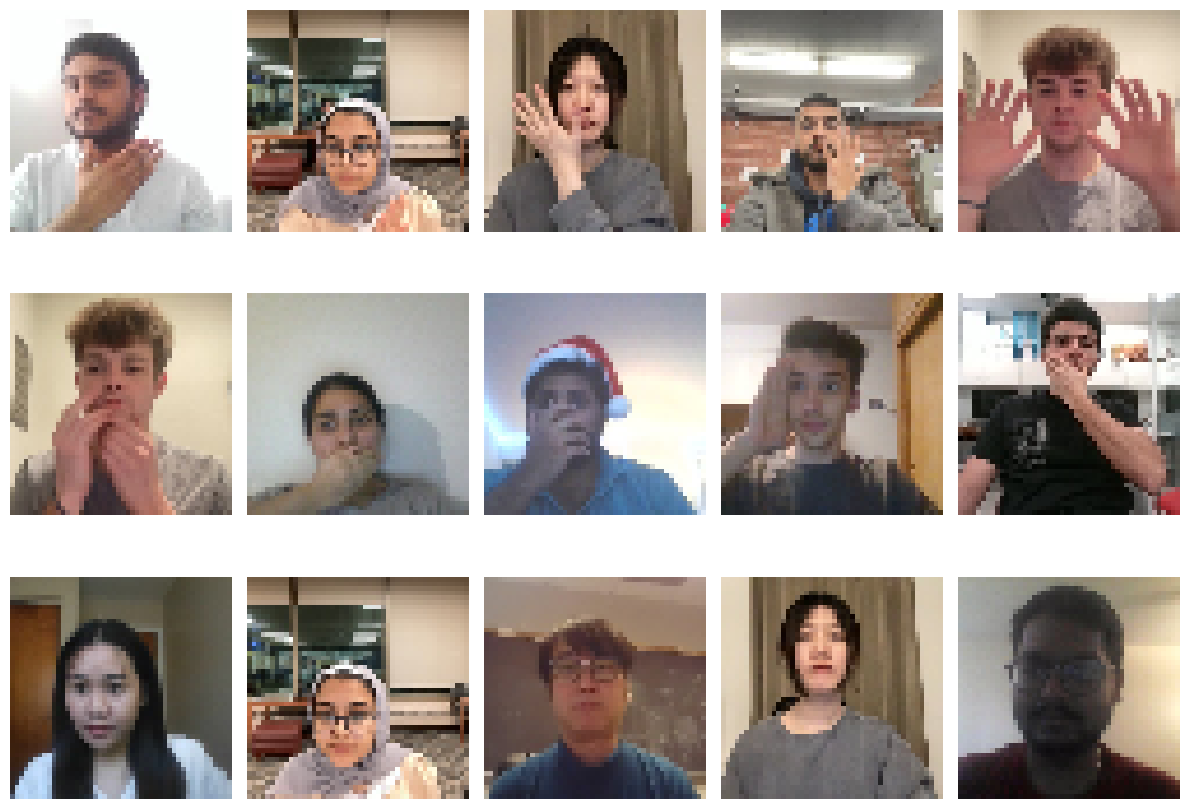

In [5]:
# display some images for every different expression

# size of the image: 48*48 pixels
pic_size = 48

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(folder_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(folder_path + "train/" + expression + "/" +os.listdir(folder_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.grid(False)
        plt.axis('off')


plt.tight_layout()
plt.show()


In [6]:
def count_images(folder_path):
    for subset in ['train', 'validation', 'test']:
        print(f"\nCounting images in {subset}:")
        subset_dir = os.path.join(folder_path, subset)
        classes = [d for d in os.listdir(subset_dir) if os.path.isdir(os.path.join(subset_dir, d))]
        for class_name in classes:
            class_dir = os.path.join(subset_dir, class_name)
            count = len([img for img in os.listdir(class_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))])
            print(f"{class_name}: {count} images")


count_images(folder_path)



Counting images in train:
Class 3 No Touch w Hands: 13052 images
Class 1 Touch: 12716 images
Class 2 No hands: 12735 images

Counting images in validation:
Class 3 No Touch w Hands: 2797 images
Class 1 Touch: 2725 images
Class 2 No hands: 2730 images

Counting images in test:
Class 3 No Touch w Hands: 2797 images
Class 1 Touch: 2725 images
Class 2 No hands: 2730 images


In [7]:

image_size = (48, 48)
batch_size_1 = 128
batch_size_test = 128
   

# Training data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # Randomly horizontal shift
    height_shift_range=0.2,  # Randomly vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Vertically flip images randomly
    fill_mode='nearest',  # Strategy used for filling in newly created pixels  
    brightness_range=[0.5, 1.5]  #Random brightness adjustment
)

train_generator = train_datagen.flow_from_directory(
    Train_set,
    target_size=image_size, 
    batch_size=batch_size_1,
    class_mode='categorical',  
    color_mode='grayscale'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    )

validation_generator = validation_datagen.flow_from_directory(
    Validation_set,
    target_size=image_size,
    batch_size=batch_size_1,
    class_mode='categorical', 
    color_mode='grayscale',
    shuffle=False
)

test_datagen = ImageDataGenerator( 
    rescale=1./255,
    )

test_generator = test_datagen.flow_from_directory(
    Test_set,
    target_size=image_size,  
    batch_size=batch_size_test,  
    class_mode='categorical', 
    color_mode='grayscale',
    shuffle=False  
)

Found 38503 images belonging to 3 classes.
Found 8252 images belonging to 3 classes.
Found 8252 images belonging to 3 classes.


In [8]:

no_of_classes = 3

model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,456,963 (9.37 MB)

 Trainable params: 2,455,491 (9.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [9]:
checkpoint = ModelCheckpoint(
    "./model.keras",  # Use '.keras' extension instead of '.h5'
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.00001
    )

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 50

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [163]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3407 - loss: 1.2947
Epoch 1: val_accuracy improved from -inf to 0.33931, saving model to ./model.keras
301/301 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.3407 - loss: 1.2944 - val_accuracy: 0.3393 - val_loss: 1.0992 - learning_rate: 0.0010
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3477 - loss: 1.1400
Epoch 2: val_accuracy improved from 0.33931 to 0.37215, saving model to ./model.keras
301/301 ━━━━━━━━━━━━━━━━━━━━ 50s 162ms/step - accuracy: 0.3477 - loss: 1.1399 - val_accuracy: 0.3722 - val_loss: 1.0943 - learning_rate: 0.0010
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.3666 - loss: 1.1101
Epoch 3: val_accuracy improved from 0.37215 to 0.44862, saving model to ./model.keras
301/301 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.3667 - loss: 1.1101 - val_accuracy: 0.4486 - val_loss: 1.0655 - learning_rate: 0.0010
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/

In [164]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.suptitle('Optimizer : Adam', fontsize=20)
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.title('Accuracy', fontsize=18)
    plt.legend(loc='upper right')


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss', fontsize=18)
    plt.show()

# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

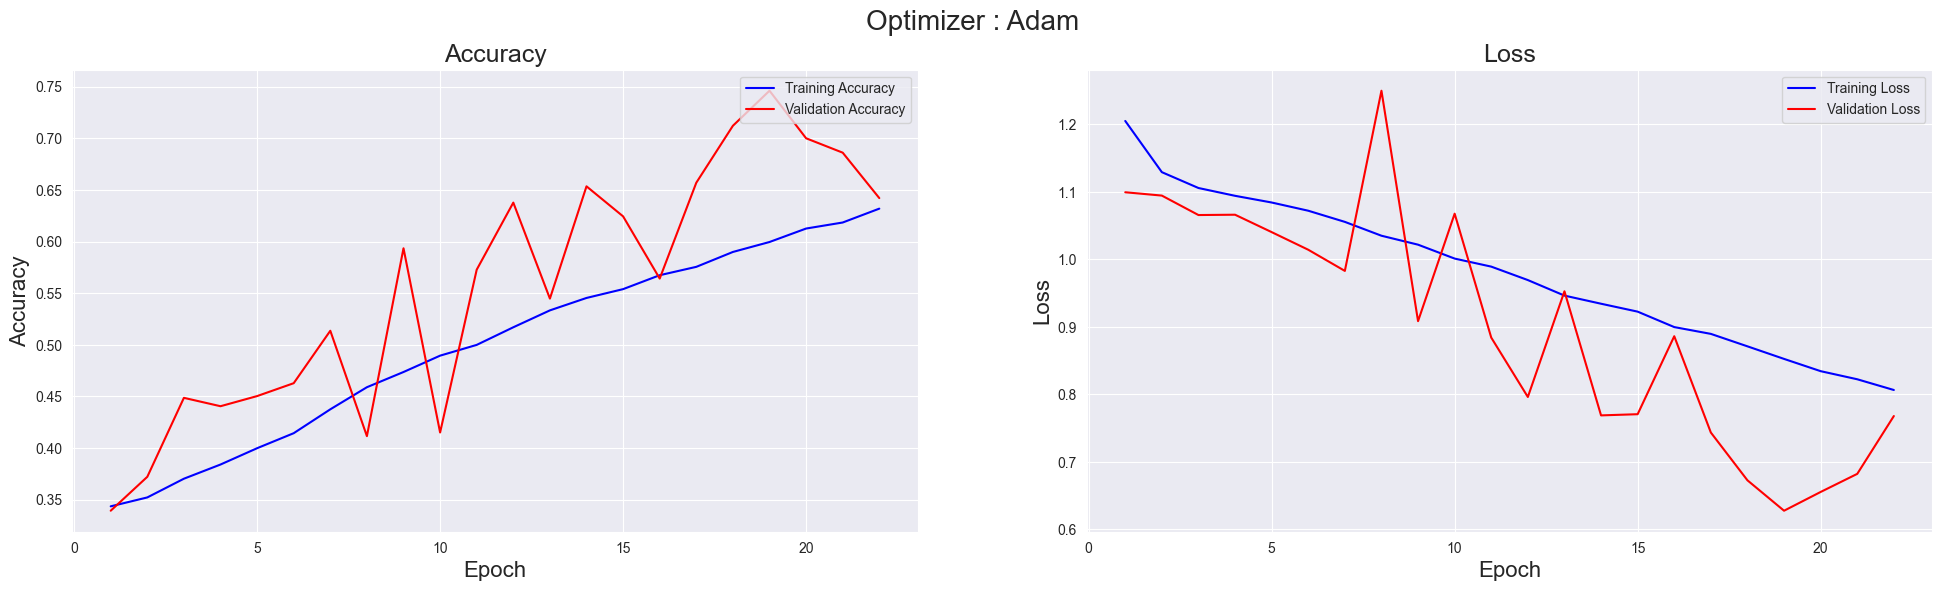

Best Validation Accuracy Score 0.74600, is for epoch 19


In [165]:
plot_results(history)
best_epoch =get_best_epcoh(history)

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step


<Figure size 640x480 with 0 Axes>

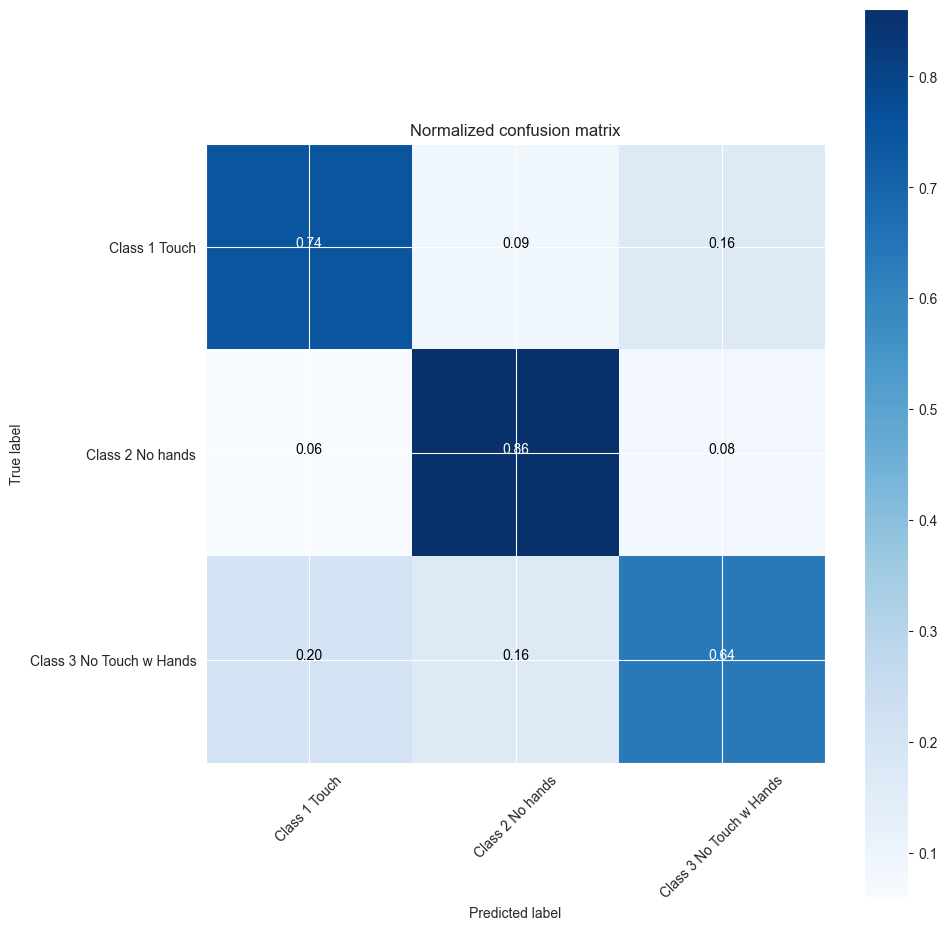

In [166]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [167]:
# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {accuracy * 100:.2f}%")

Overall accuracy: 74.60%


In [168]:

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7529 - loss: 0.6287
Test Loss: 0.6324684619903564
Test Accuracy: 0.737548828125


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step


<Figure size 640x480 with 0 Axes>

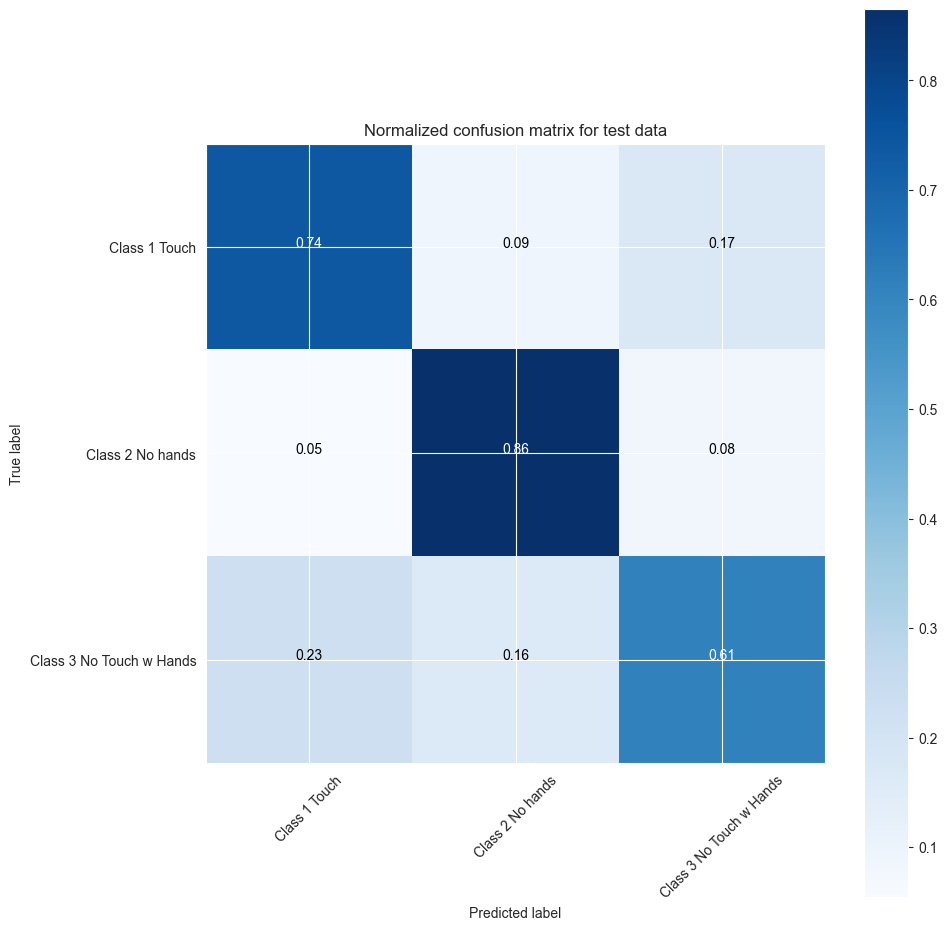

In [169]:
# show the confusion matrix for test data

# compute predictions
predictions = model.predict(test_generator)
y_pred_test = [np.argmax(probas) for probas in predictions]
y_test_test = test_generator.classes
class_names = test_generator.class_indices.keys()


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test_test, y_pred_test)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix for test data')
plt.show()

In [170]:
# Calculate overall accuracy with test data
accuracy = accuracy_score(y_test_test, y_pred_test)
print(f"Overall accuracy: {accuracy * 100:.2f}%")

Overall accuracy: 73.72%


In [10]:
model.save("my_project2.keras")